In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from time import time

/var/folders/4b/f86rqqqj3rg8vczy4jw34t6r0000gn/T/ipykernel_66421/3816000047.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_pickle('pifsc_embeddings.pkl')

dist_df = pd.read_csv('pifsc_labels_detail.csv')
df = pd.DataFrame(data).T

In [33]:
for x, y in zip(df.index, pd.Series(dist_df['image']).values):
    assert x == y
distinctive = dist_df['distinctiveness']

df = df.assign(Distinctiveness=pd.Series(distinctive).values)

# ohe = OneHotEncoder(sparse_output=False).fit(df[['Distinctiveness']])

# Y = ohe.transform(df[['Distinctiveness']])
Y = df['Distinctiveness']
sc = StandardScaler()
X = sc.fit_transform(df.drop('Distinctiveness', axis=1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, stratify=Y)

0011f7a65044e4.jpg    2
007097146016e6.jpg    2
009a307f9f483c.jpg    2
00eea1a5b9d8bc.jpg    2
01287e826d29a8.jpg    2
                     ..
ff98874b03715e.jpg    2
ffb6e663e44579.jpg    1
ffb8971f6aafae.jpg    2
fff6ff1989b5cd.jpg    2
fffc50be10c175.jpg    2
Name: Distinctiveness, Length: 1792, dtype: int64
                    Distinctiveness
0011f7a65044e4.jpg                2
007097146016e6.jpg                2
009a307f9f483c.jpg                2
00eea1a5b9d8bc.jpg                2
01287e826d29a8.jpg                2
...                             ...
ff98874b03715e.jpg                2
ffb6e663e44579.jpg                1
ffb8971f6aafae.jpg                2
fff6ff1989b5cd.jpg                2
fffc50be10c175.jpg                2

[1792 rows x 1 columns]


ValueError: Expected 2D array, got 1D array instead:
array=[2 2 2 ... 2 2 2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [30]:
model = LogisticRegressionCV(cv=5, max_iter=1000, class_weight='balanced', multi_class='multinomial')
model.fit(X_train, Y_train)

ValueError: y should be a 1d array, got an array of shape (1344, 3) instead.

In [23]:
print("Predicting distinctiveness")
t0 = time()
preds = model.predict(X_test)
print("Done in %0.3fs" % (time() - t0))

Predicting distinctiveness
Done in 0.010s


In [25]:
macro_precision = precision_score(Y_test, preds, average='macro')
macro_recall = recall_score(Y_test, preds, average='macro')
macro_f1 = f1_score(Y_test, preds, average='macro')

micro_precision = precision_score(Y_test, preds, average='micro')
micro_recall = recall_score(Y_test, preds, average='micro')
micro_f1 = f1_score(Y_test, preds, average='micro')

print(f"Macro Precision: {macro_precision}")
print(f"Micro Precision: {micro_precision}")
print(f"Macro Recall: {macro_recall}")
print(f"Micro Recall: {micro_recall}")
print(f"Macro F1: {macro_f1}")
print(f"Micro F1: {micro_f1}")

Macro Precision: 0.94214024592888
Micro Precision: 0.9486607142857143
Macro Recall: 0.9435455192034139
Micro Recall: 0.9486607142857143
Macro F1: 0.9428365371279576
Micro F1: 0.9486607142857143


              precision    recall  f1-score   support

           1       0.92      0.93      0.92       152
           2       0.96      0.96      0.96       296

    accuracy                           0.95       448
   macro avg       0.94      0.94      0.94       448
weighted avg       0.95      0.95      0.95       448



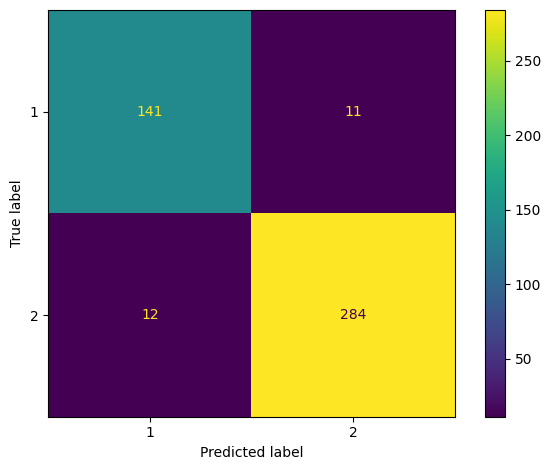

In [26]:
print(classification_report(Y_test, preds))
ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)
plt.tight_layout()